In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

<Figure size 800x600 with 0 Axes>

In [3]:
%load_ext lab_black

In [4]:
cols = [
    "STCNTY",
    "FIPS",
    "E_TOTPOP",
    "E_AGE65",
    "E_AGE17",
]

In [5]:
df = helper_400.get_svi_df(cols)

In [6]:
df["E_AGEMID"] = df["E_TOTPOP"] - df[["E_AGE65", "E_AGE17"]].sum(axis=1)

In [7]:
df.head()

,STCNTY,FIPS,E_TOTPOP,E_AGE65,E_AGE17,E_AGEMID
0,6001,6001400100,3035,768,566,1701
1,6001,6001400200,1983,431,324,1228
2,6001,6001400300,5058,831,860,3367
3,6001,6001400400,4179,452,882,2845
4,6001,6001400500,4021,609,462,2950


# Exposure per FIPS over time

In [8]:
exposure = helper_400.get_exposure_df()

In [9]:
len(exposure)

8673

In [10]:
df = df.merge(exposure, left_on="FIPS", right_on="GEOID")

In [11]:
len(df)

8673

In [12]:
df.head()

,STCNTY,FIPS,E_TOTPOP,E_AGE65,E_AGE17,E_AGEMID,GEOID,wfday,heatday,smoke_pm_non_zero,smoke_pm_gt_five,hw,hs,hws,ws,hs5,hws5,ws5
0,6001,6001400100,3035,768,566,1701,6001400100,0,289,433,134,0,61,0,0,25,0,0
1,6001,6001400200,1983,431,324,1228,6001400200,0,300,410,136,0,50,0,0,20,0,0
2,6001,6001400300,5058,831,860,3367,6001400300,0,300,410,136,0,50,0,0,20,0,0
3,6001,6001400400,4179,452,882,2845,6001400400,0,300,410,136,0,50,0,0,20,0,0
4,6001,6001400500,4021,609,462,2950,6001400500,0,300,410,136,0,50,0,0,20,0,0


In [13]:
df.sum()

STCNTY                     52514607
FIPS                 52516305953373
E_TOTPOP                   37829022
E_AGE65                     5412284
E_AGE17                     8687027
E_AGEMID                   23729711
GEOID                52516305953373
wfday                         30507
heatday                     2526971
smoke_pm_non_zero           3316199
smoke_pm_gt_five            1164300
hw                             1753
hs                           489817
hws                             693
ws                             5625
hs5                          181968
hws5                            367
ws5                            2746
dtype: int64

In [14]:
df.columns

Index(['STCNTY', 'FIPS', 'E_TOTPOP', 'E_AGE65', 'E_AGE17', 'E_AGEMID', 'GEOID',
       'wfday', 'heatday', 'smoke_pm_non_zero', 'smoke_pm_gt_five', 'hw', 'hs',
       'hws', 'ws', 'hs5', 'hws5', 'ws5'],
      dtype='object')

In [15]:
hotspots = helper_400.hotspots

In [16]:
age_cols = ["E_AGE65", "E_AGE17", "E_AGEMID"]

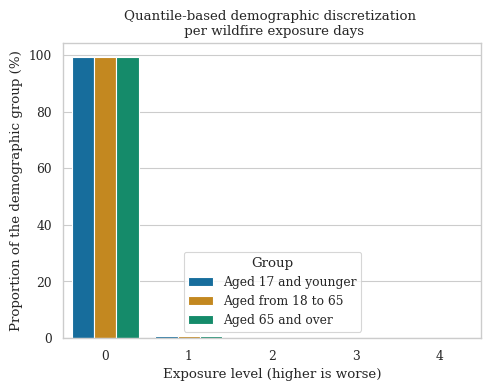

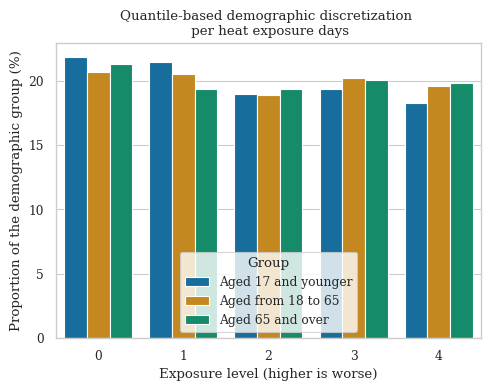

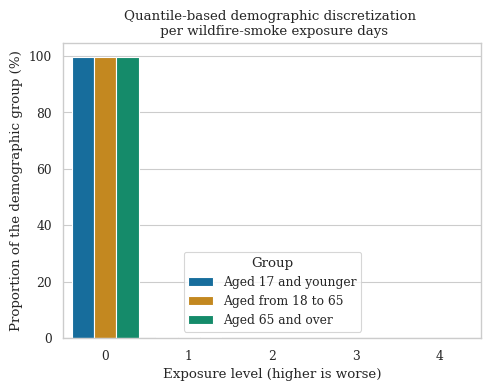

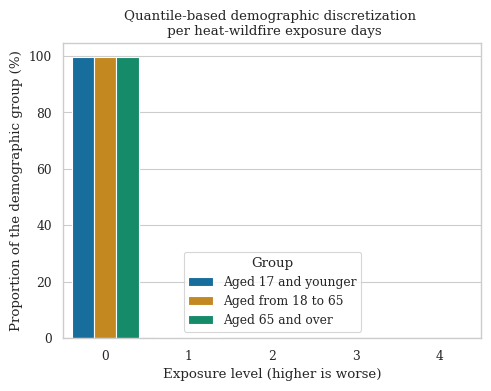

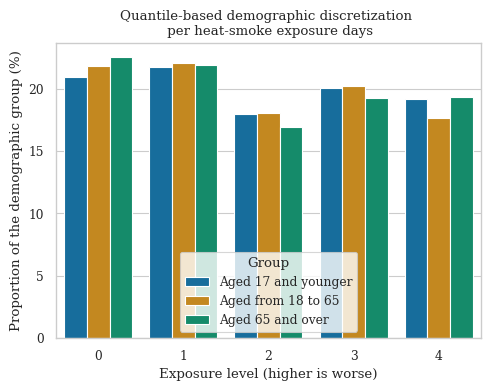

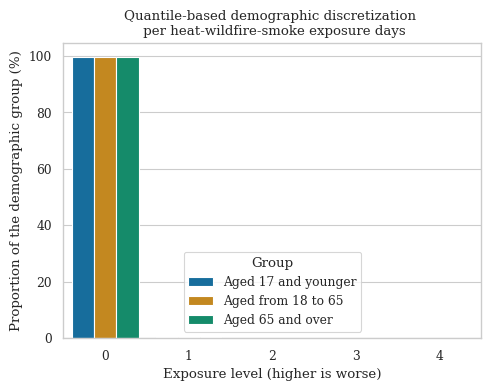

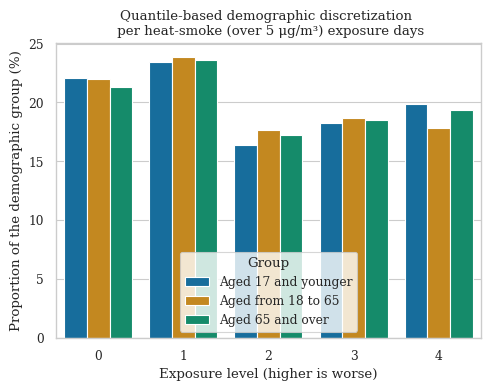

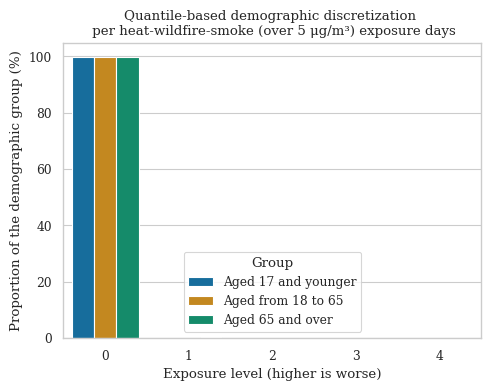

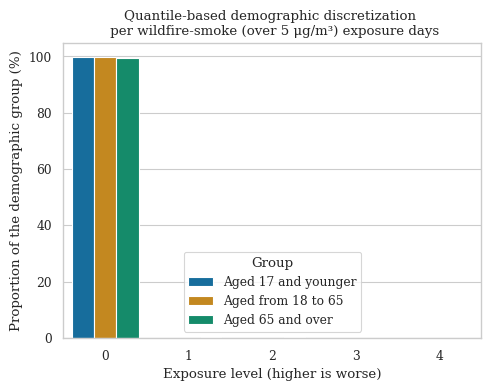

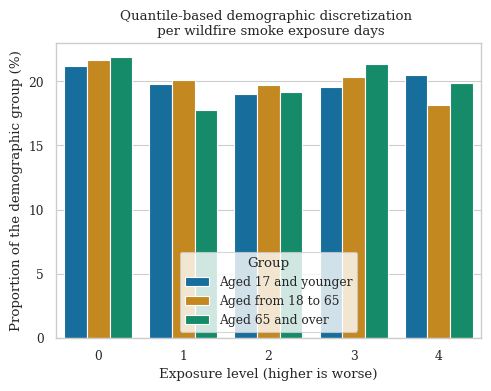

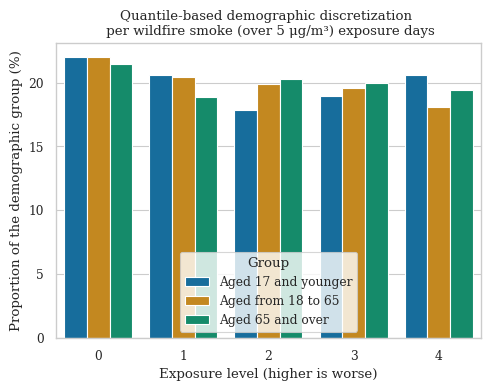

In [22]:
for hspt in list(hotspots.keys()):
    # print(hspt)
    df["exposure_category"] = hotspots[hspt]["func"](
        df[hspt],
        5,
        duplicates="drop",
        labels=False,  # ["low", "medium", "high"],  # , ordered=False
    )

    exposure_per_category = df.groupby("exposure_category")[age_cols].sum()

    for dc in age_cols:
        exposure_per_category[dc + "_normalized"] = (
            exposure_per_category[dc] * 100 / exposure_per_category[dc].sum()
        )

    exposure_per_category = exposure_per_category.drop(columns=age_cols)

    exposure_per_category = exposure_per_category.rename(
        columns={
            "E_AGE65_normalized": "Aged 65 and over",
            "E_AGE17_normalized": "Aged 17 and younger",
            "E_AGEMID_normalized": "Aged from 18 to 65",
        }
    )
    exposure_per_category = exposure_per_category[
        ["Aged 17 and younger", "Aged from 18 to 65", "Aged 65 and over"]
    ]
    helper_400.plot_qbar(
        exposure_per_category, hspt, figname="age", legloc="lower center"
    )